In [1]:
import pandas as pd

In [4]:
df=pd.read_csv("covid_toy.csv")

In [5]:
df.head()   #head for top 5 rows

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [6]:
df.tail()   #head for bottom 5 rows

,age,gender,fever,cough,city,has_covid
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No
99,10,Female,98.0,Strong,Kolkata,Yes


In [7]:
df.columns   #give column name

Index(['age', 'gender', 'fever', 'cough', 'city', 'has_covid'], dtype='object')

In [9]:
df.dtypes    # for all columns data atype

age            int64
gender        object
fever        float64
cough         object
city          object
has_covid     object
dtype: object

In [10]:
df.info()    #it will return over all information over all dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [13]:
df.describe()   # it will return statically view of data

,age,fever
count,100.000000,90.000000
mean,44.220000,100.844444
std,24.878931,2.054926
min,5.000000,98.000000
25%,20.000000,99.000000
50%,45.000000,101.000000
75%,66.500000,102.750000
max,84.000000,104.000000


# How can we check missing values in dataframe

In [14]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [15]:
df['fever'].mean()

100.84444444444445

In [16]:
df['fever']=df['fever'].fillna(100)

In [17]:
df.isnull().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

# If i want to check total sub categories in a column then we use value_count

In [18]:
df['gender'].value_counts()

gender
Female    59
Male      41
Name: count, dtype: int64

In [19]:
df['cough'].value_counts()

cough
Mild      62
Strong    38
Name: count, dtype: int64

In [20]:
df['has_covid'].value_counts()

has_covid
No     55
Yes    45
Name: count, dtype: int64

# loc and iloc

In [22]:
# df.loc[row_range,columns_range]--->last index value will be include
# df.iloc[row_range,columns_range]-->last index value will not include
# purpose:Dataframe CURD operation

In [23]:
df.loc[2:5,['gender','has_covid']]

,gender,has_covid
2,Male,No
3,Female,No
4,Female,No
5,Female,Yes


In [24]:
df.iloc[2:5,[0,1,2]]

,age,gender,fever
2,42,Male,101.0
3,31,Female,98.0
4,65,Female,101.0


In [25]:
df['Gender']=df['gender']

In [30]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [27]:
df=df.drop(columns=['Gender'])

In [28]:
df.head(3)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No


In [31]:
df['gender'].value_counts()

gender
Female    59
Male      41
Name: count, dtype: int64

In [35]:
df['Gender']=df['gender'].map({'Female':0,'Male':1})

In [42]:
df.sample(2)

,age,gender,fever,cough,city,has_covid,Updated_Gender
42,27,Male,100.0,Mild,Delhi,Yes,1
83,17,Female,104.0,Mild,Kolkata,No,0


# How can we rename a column name

In [38]:
df = df.rename(columns = {
"Gender" :"Updated_Gender"})

In [40]:
df.head(2)

,age,gender,fever,cough,city,has_covid,Updated_Gender
0,60,Male,103.0,Mild,Kolkata,No,1
1,27,Male,100.0,Mild,Delhi,Yes,1


In [44]:
df2=df.copy()

In [45]:
df2.head()

,age,gender,fever,cough,city,has_covid,Updated_Gender
0,60,Male,103.0,Mild,Kolkata,No,1
1,27,Male,100.0,Mild,Delhi,Yes,1
2,42,Male,101.0,Mild,Delhi,No,1
3,31,Female,98.0,Mild,Kolkata,No,0
4,65,Female,101.0,Mild,Mumbai,No,0


# groupby 

In [46]:
# groupby is use for aggrigation--->aggregation methods(sum,min,max,count,avg.)

In [47]:
df_yes = df[df[ 'has_covid' ] == 'Yes' ]
df_yes.head(3)


,age,gender,fever,cough,city,has_covid,Updated_Gender
1,27,Male,100.0,Mild,Delhi,Yes,1
5,84,Female,100.0,Mild,Bangalore,Yes,0
7,20,Female,100.0,Strong,Mumbai,Yes,0


In [48]:
df_yes.groupby('gender')['has_covid'].size().reset_index()

,gender,has_covid
0,Female,25
1,Male,20


In [49]:
df_yes.groupby('city')['has_covid'].size().reset_index()

,city,has_covid
0,Bangalore,13
1,Delhi,9
2,Kolkata,15
3,Mumbai,8


In [50]:
df_yes.groupby('cough')['has_covid'].size().reset_index()

,cough,has_covid
0,Mild,30
1,Strong,15


# Project No.1

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    #Data visulization liberay
import seaborn as sns

In [59]:
# Reviews --- > Textual format --- > Encode in Numerical format
# Textblob Library --- >
# He is a good boy .
# He Loves maths
# step-1 ---- > Unique words separate
# He is a good boy Loves maths
# step-2 Convert text into array .
# He is a good boy Loves maths
# [1111100]
# [1000011] ---- > Arrays --- > positional encoding ---- > 0.1< positive , -0.1> negative , 0 Neutral

In [ ]:
df=pd.read_csv("linkedin-reviews.csv")

In [ ]:
df.head(3)

# Exploratory Data Analysis
We will start by analyzing the distributions of ratings. It will provide insight into the overall sentiment of the reviews, Then we
can explore further, such as analyzing the length of reviews , and possibly derive insights from the text of the reviews.
Plotting the Distribution of Ratings

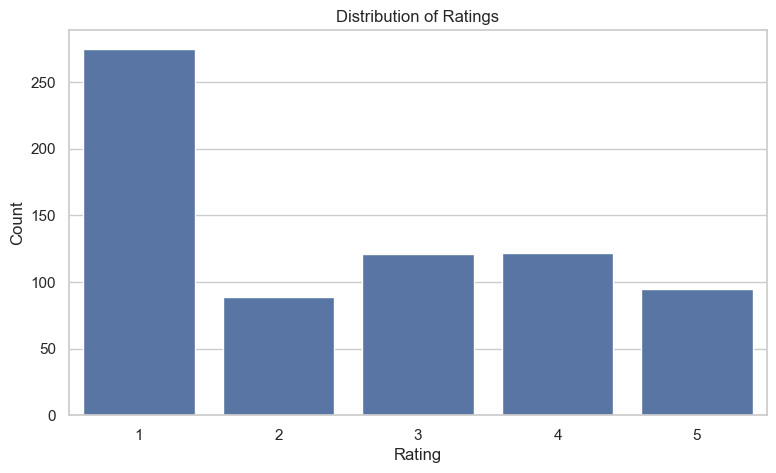

In [61]:
sns. set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns. countplot(data = df , x = 'Rating' )
plt. title('Distribution of Ratings')
plt. xlabel ('Rating' )
plt. ylabel ('Count' )
plt. show()


In [62]:
from textblob import TextBlob

In [70]:
def textblob_sentiment_analysis(review) :
    sentiment = TextBlob(review). sentiment 
    if sentiment. polarity > 0.1 :
        return 'Positive'
    elif sentiment.polarity < - 0.1 :
        return 'Negative'
    else :
        return 'Neutral'

In [72]:
df['Sentiment']=df['Review'].apply(textblob_sentiment_analysis)


In [74]:
df.sample(5)

,Review,Rating,Sentiment
660,Forces close every time I attempt to open unin...,3,Negative
480,Doesn't login,1,Neutral
567,"Updates just hang, linkedin not available",1,Negative
510,Great new UI (2.0)! Sync with contacts is also...,4,Positive
473,Useless. Serves no purpose. Trying to be twitt...,1,Negative


<Axes: ylabel='count'>

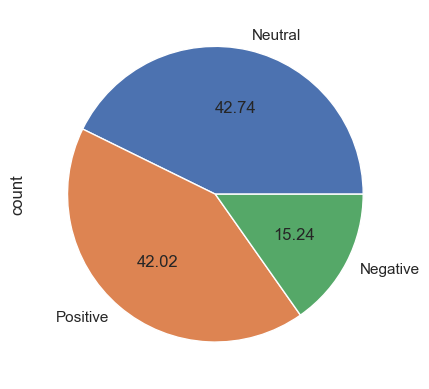

In [75]:
df['Sentiment'].value_counts().plot(kind="pie",autopct="%.2f")

# Setiment according Ratings

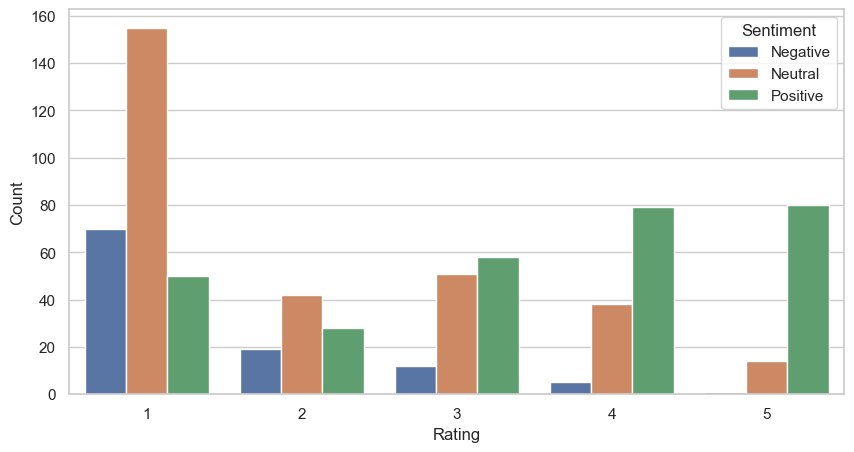

In [78]:
plt.figure(figsize = (10,5))
sns. countplot(data = df,
                x = 'Rating',
                hue = 'Sentiment')
plt. xlabel ('Rating' )
plt. ylabel ( 'Count' )
plt. legend(title='Sentiment' )
plt. show()